# MMG

debug tuple <class 'numpy.ndarray'>
debug tuple <class 'numpy.ndarray'>


/home/djdaniel/GENE_UQ/sparseSpACE/../GENE_ML/gene_ml/test_functions/max_of_many_gaussians.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figure.show()


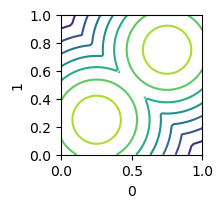

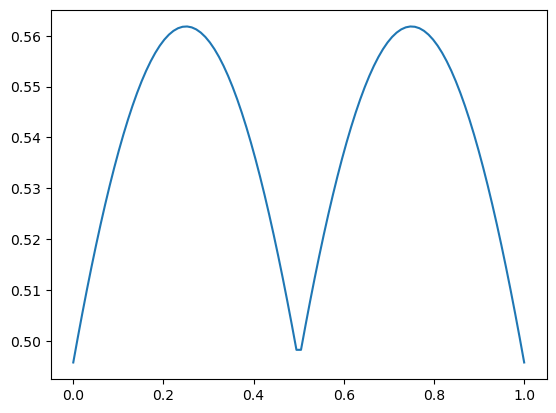

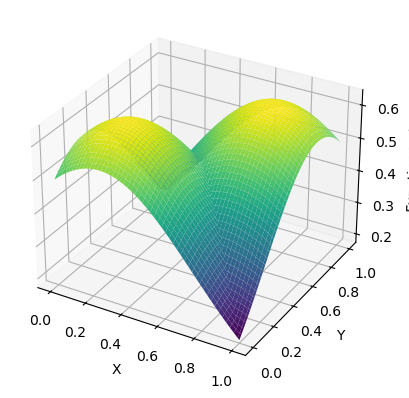

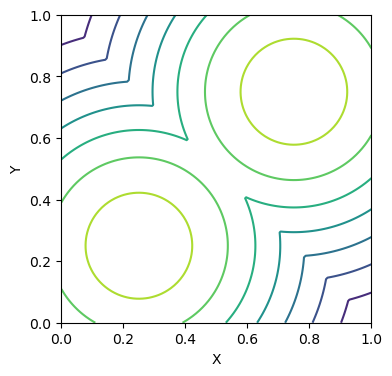

In [1]:
from sparseSpACE.Function import Function
import numpy as np
class function_wrap(Function):
    def __init__(self, function):
        # The function must be defined to be 0 outside the same boundaries that will be fed into SparseSpACE
        super().__init__()
        self.function = function

    def eval(self,X):
        return self.function(X)

import sys
import matplotlib.pyplot as plt
import os
sys.path.append(os.path.join(os.curdir,'..'))
from GENE_ML.gene_ml.test_functions.max_of_many_gaussians import MaxOfManyGaussians

num_dim = 2
confine = 0#0.5
mean_bounds = [(0+confine,1-confine) for i in range(num_dim)]
bounds = [(0,1) for i in range(num_dim)]
std_bounds=(0.1,0.5)
# std_bounds=(0.008,0.01)

num_gaussians = 2
mmg = MaxOfManyGaussians(num_dim, bounds)#num_dim, num_gaussians, bounds, mean_bounds, std_bounds, seed=10)
mmg.specify_gaussians(means=np.array([[0.25,0.25], [0.75,0.75]]), stds = np.array([[0.5,0.5],[0.5,0.5]]))
# mmg.plot_2d_gaussians(extra=0, grid_size=200, plot_bounds=[(0,1),(0,1)], style='contour')
# mmg.plot_2D_of_many(which2=(0,1), style='contour')
mmg.plot_matrix_contour()
if num_dim == 2: mmg.plot_2d_gaussians()
mmg_wraped = function_wrap(mmg.evaluate)

## Extend-Split Strategy

The Extend-Split Strategy is an effective method to spatially adapt to a function with highly local behaviour for moderate dimensionality (<= 10). The adaptation process is governed by 2 operations: the split and the extend operation. The scheme starts with a refinement graph that does a standard domain decomposition of the domain into $2^{dim}$ parts. It is then possible to perform either a split or a extend for each of these subregions.
The split operations splits a subregion into $2^{dim}$ equally sized subregions and at the same time doubles the points for each dimension (by adding the same number of points per dimension for the subblocks compared to the original area). This corresponds to increasing the truncation parameter or the minimum level of the combination scheme locally. In the refinement graph this corresponds to a quadtree refinement (in higher dimensions octree, ...).

The Extend operation on the other hand increases the target level and therefore might increase the number of overall grids of the combination scheme. However, the refinement graph stays constant during this operation.

As a result splitting enables us to get more and more fine-grained adaptation as the subregion where we can refine get smaller and smaller. However, splitting gets more and more costly the higher the dimension of the problem and it does not add new very anisotropic subspaces to the scheme. These shortcoming are however targettet by the extend scheme. Therefore, we have to consider the trade-off between splitting and extending to get the best adaptation.

This is the example from the Tutorial which refines to grid to a discontinous function. Here we define number_of_refinements_before_extend=2 which means that for each intital subregion we first perform 2 splits before we start extending, i.e. the depth in the quadtree refinement tree that we traverse is limited to 3 (if we already count the initial $2^{dim}$ splitting as depth 1).

We enable plotting to show you the evolution of the adaptive refinement. You can see the refinementgraph which does the quadtree refinement and the corresponding component and sparse grids which result from the combination.

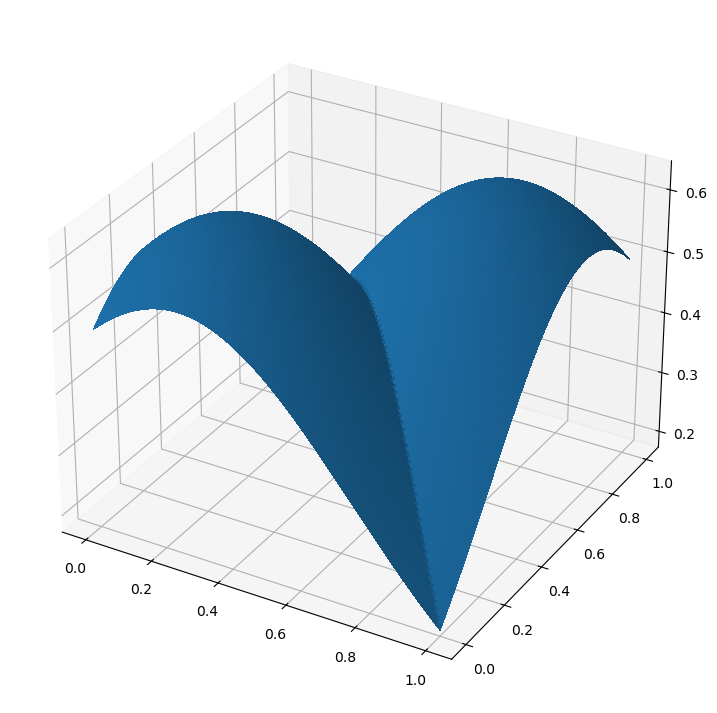

0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
Current number of function evaluations 21
combiintegral: 0.5065507351241021
Current error: 0.016088572279491425
Finished refinement
Refined 2 times
Current number of function evaluations 47
combiintegral: 0.516033943672239
Current error: 0.012152115745137804
Finished refinement
Refined 2 times
Current number of function evaluations 65
combiintegral: 0.5078874393436145
Current error: 0.015015159449238001
Finished refinement
Refined 2 times
Current number of function evaluations 91
combiintegral: 0.5068343654943777
Current error: 0.012936208651079112
Finished refinement
Refined 8 times
Current number of function evaluations 179
combiintegral: 0.5090006088368153
Current error: 0.00548190289648647
Last plot
Contour plot:


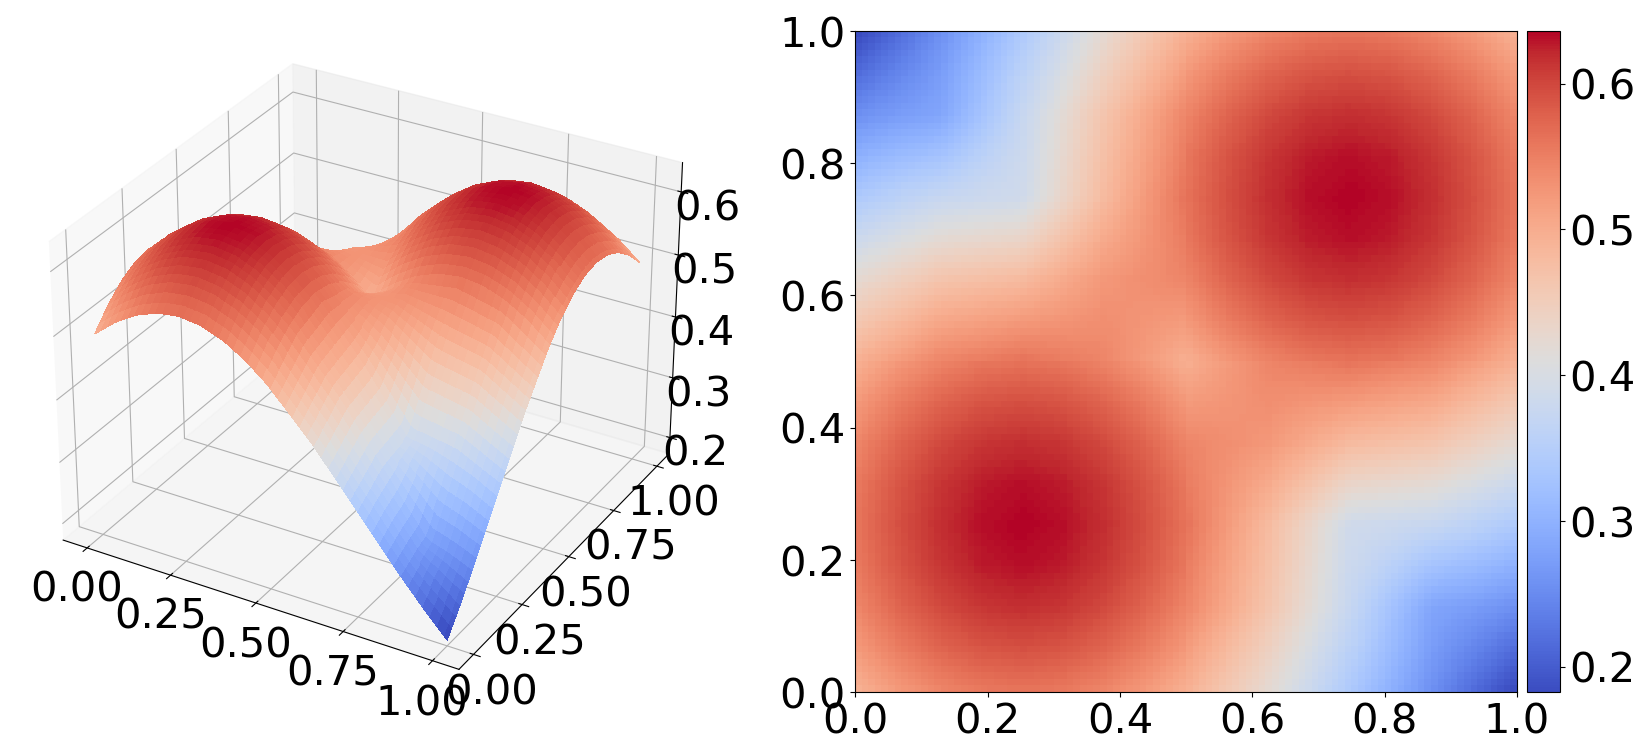

Refinement Graph:


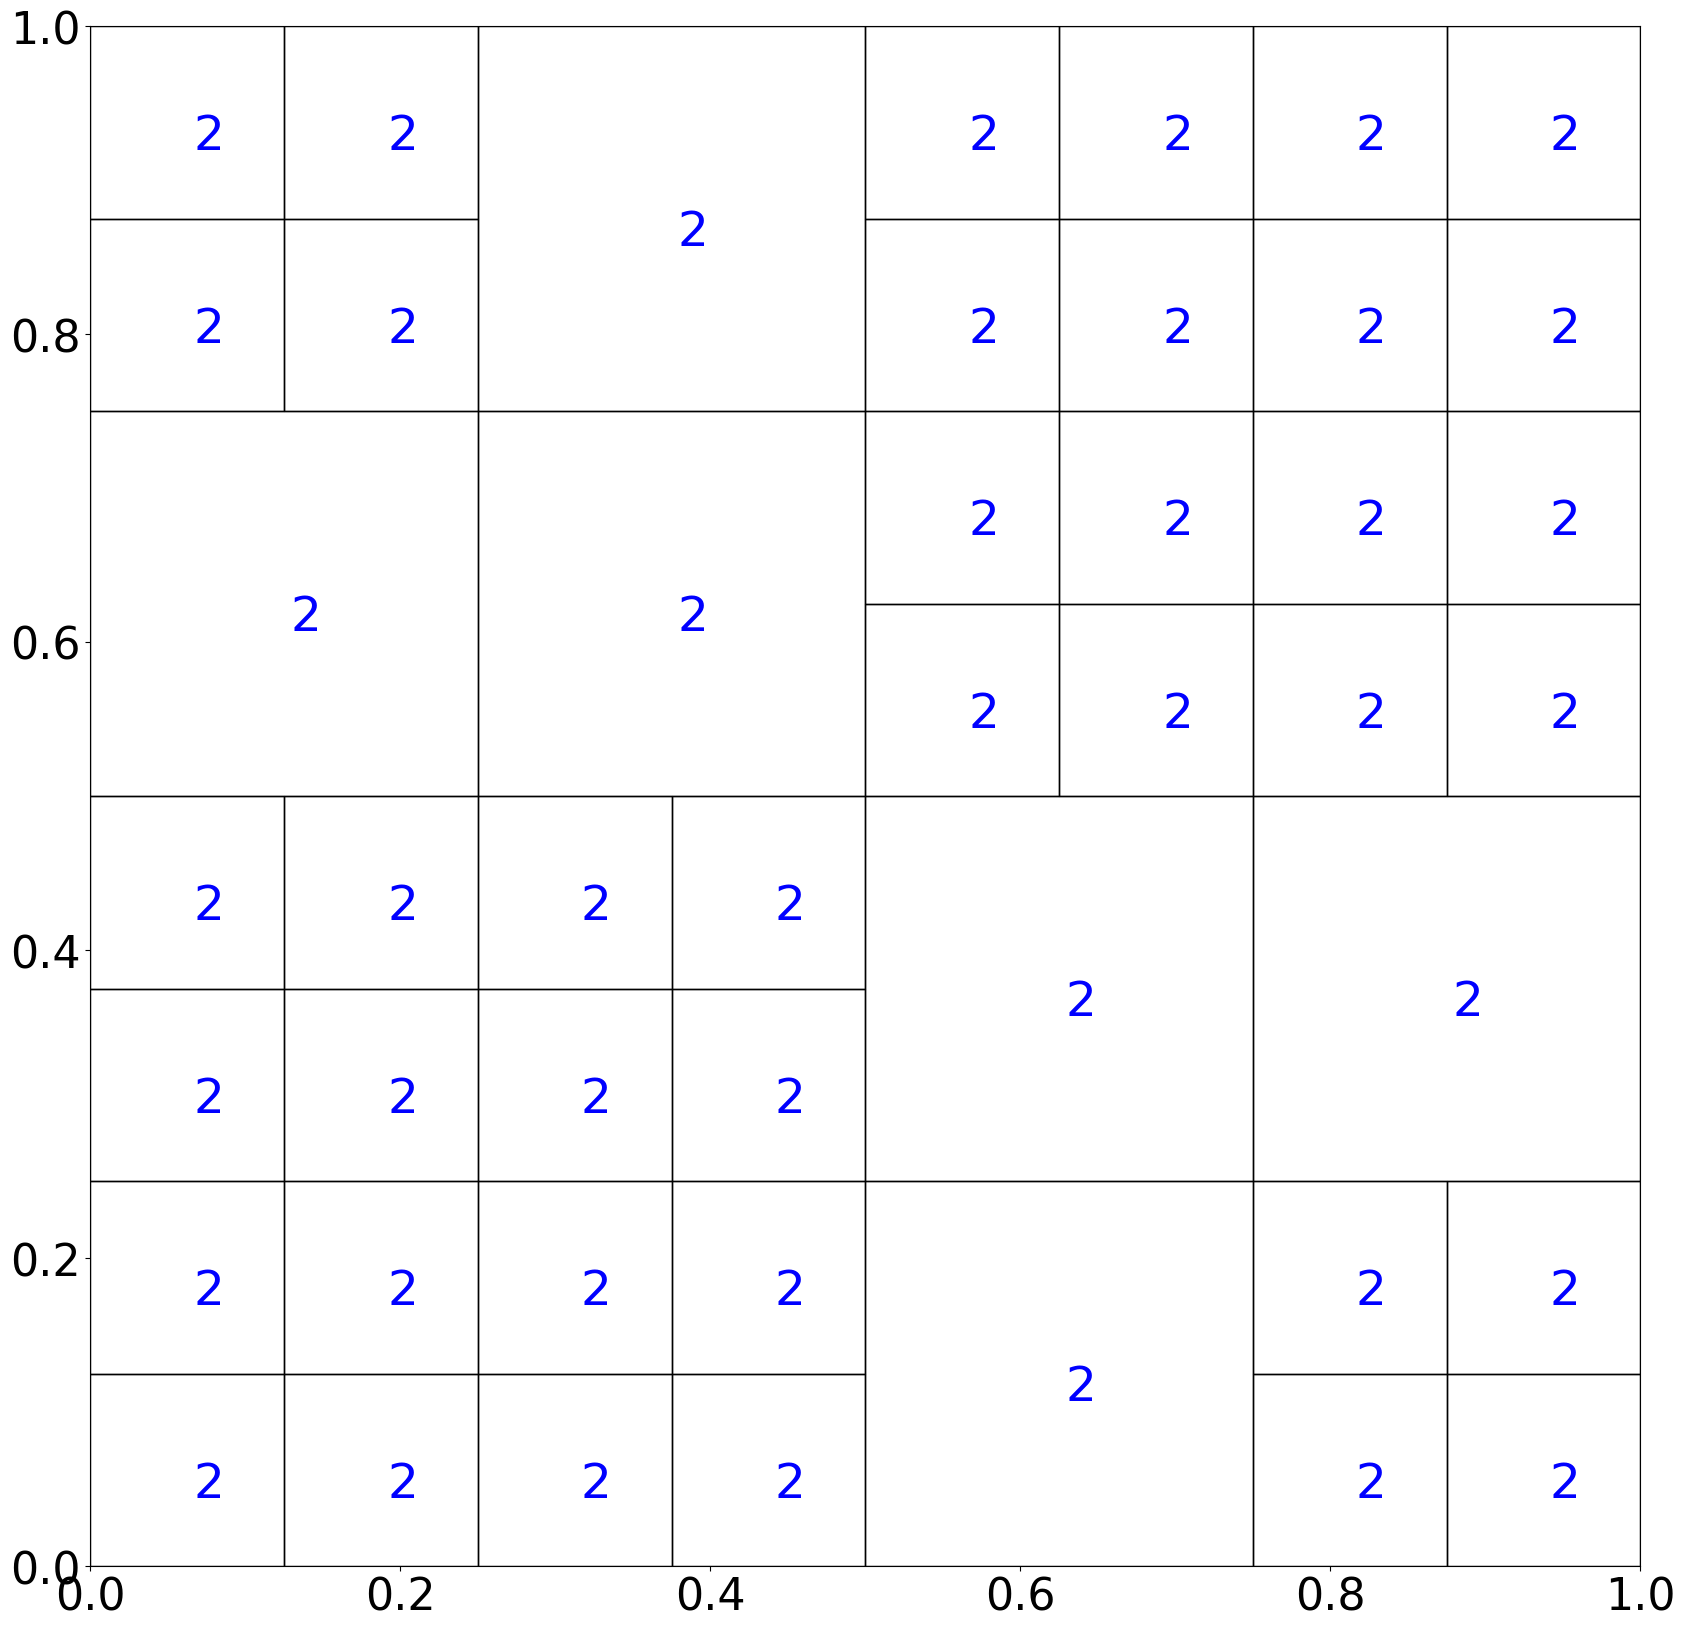

Combi Scheme:


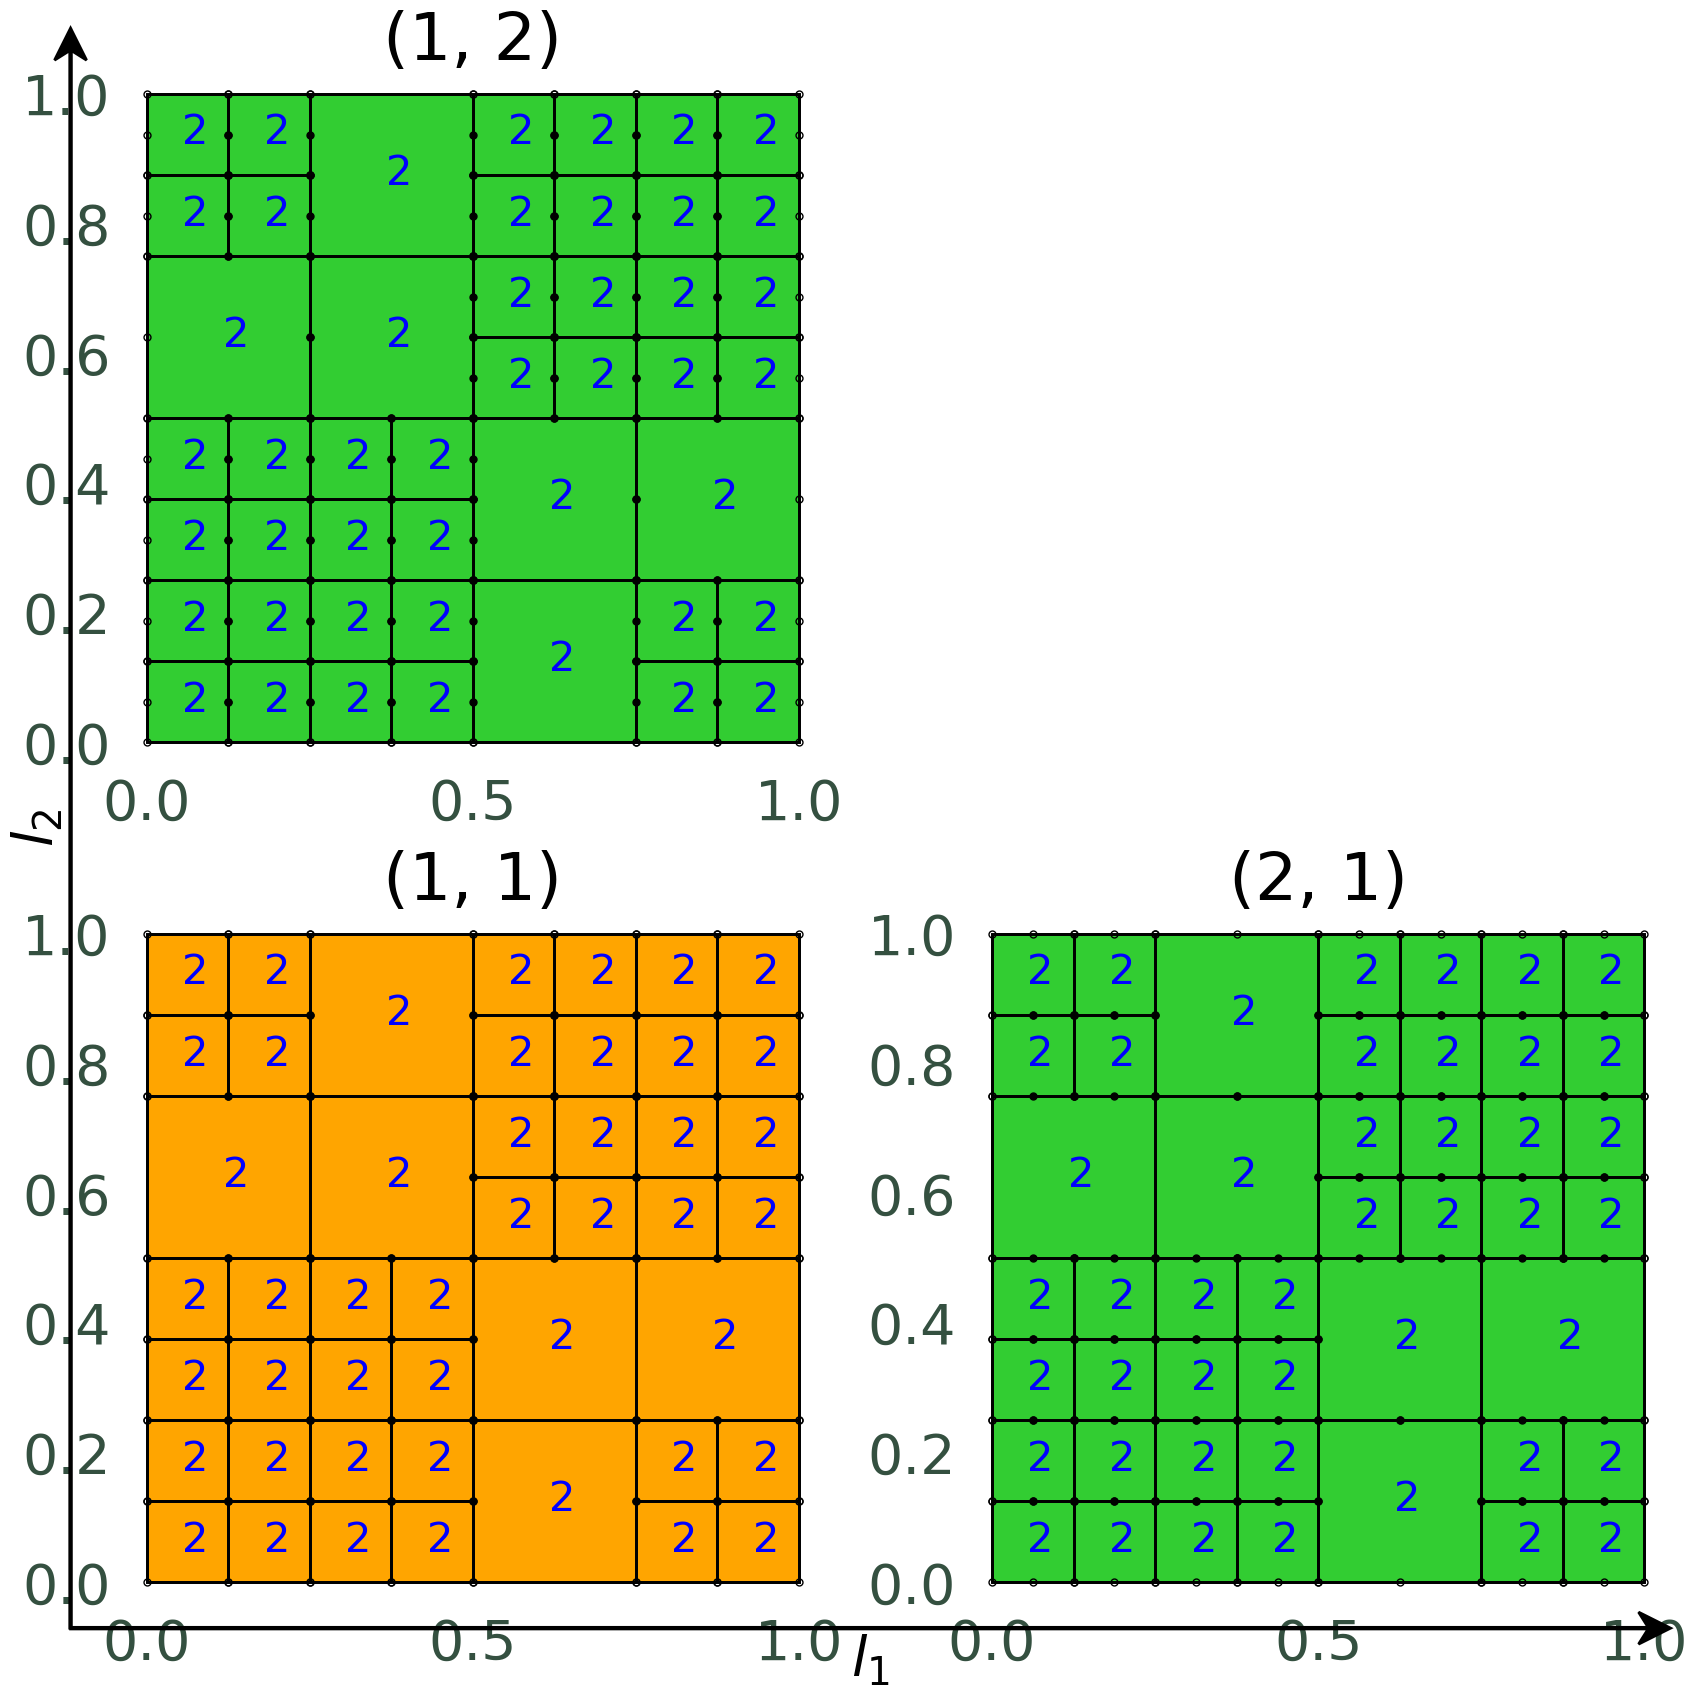

Resulting Sparse Grid:
dim 2
debug mesh [array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
        0.01010101],
       [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
        0.02020202],
       ...,
       [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
        0.97979798],
       [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
        0.98989899],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]]), array([[0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       ...,
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.    

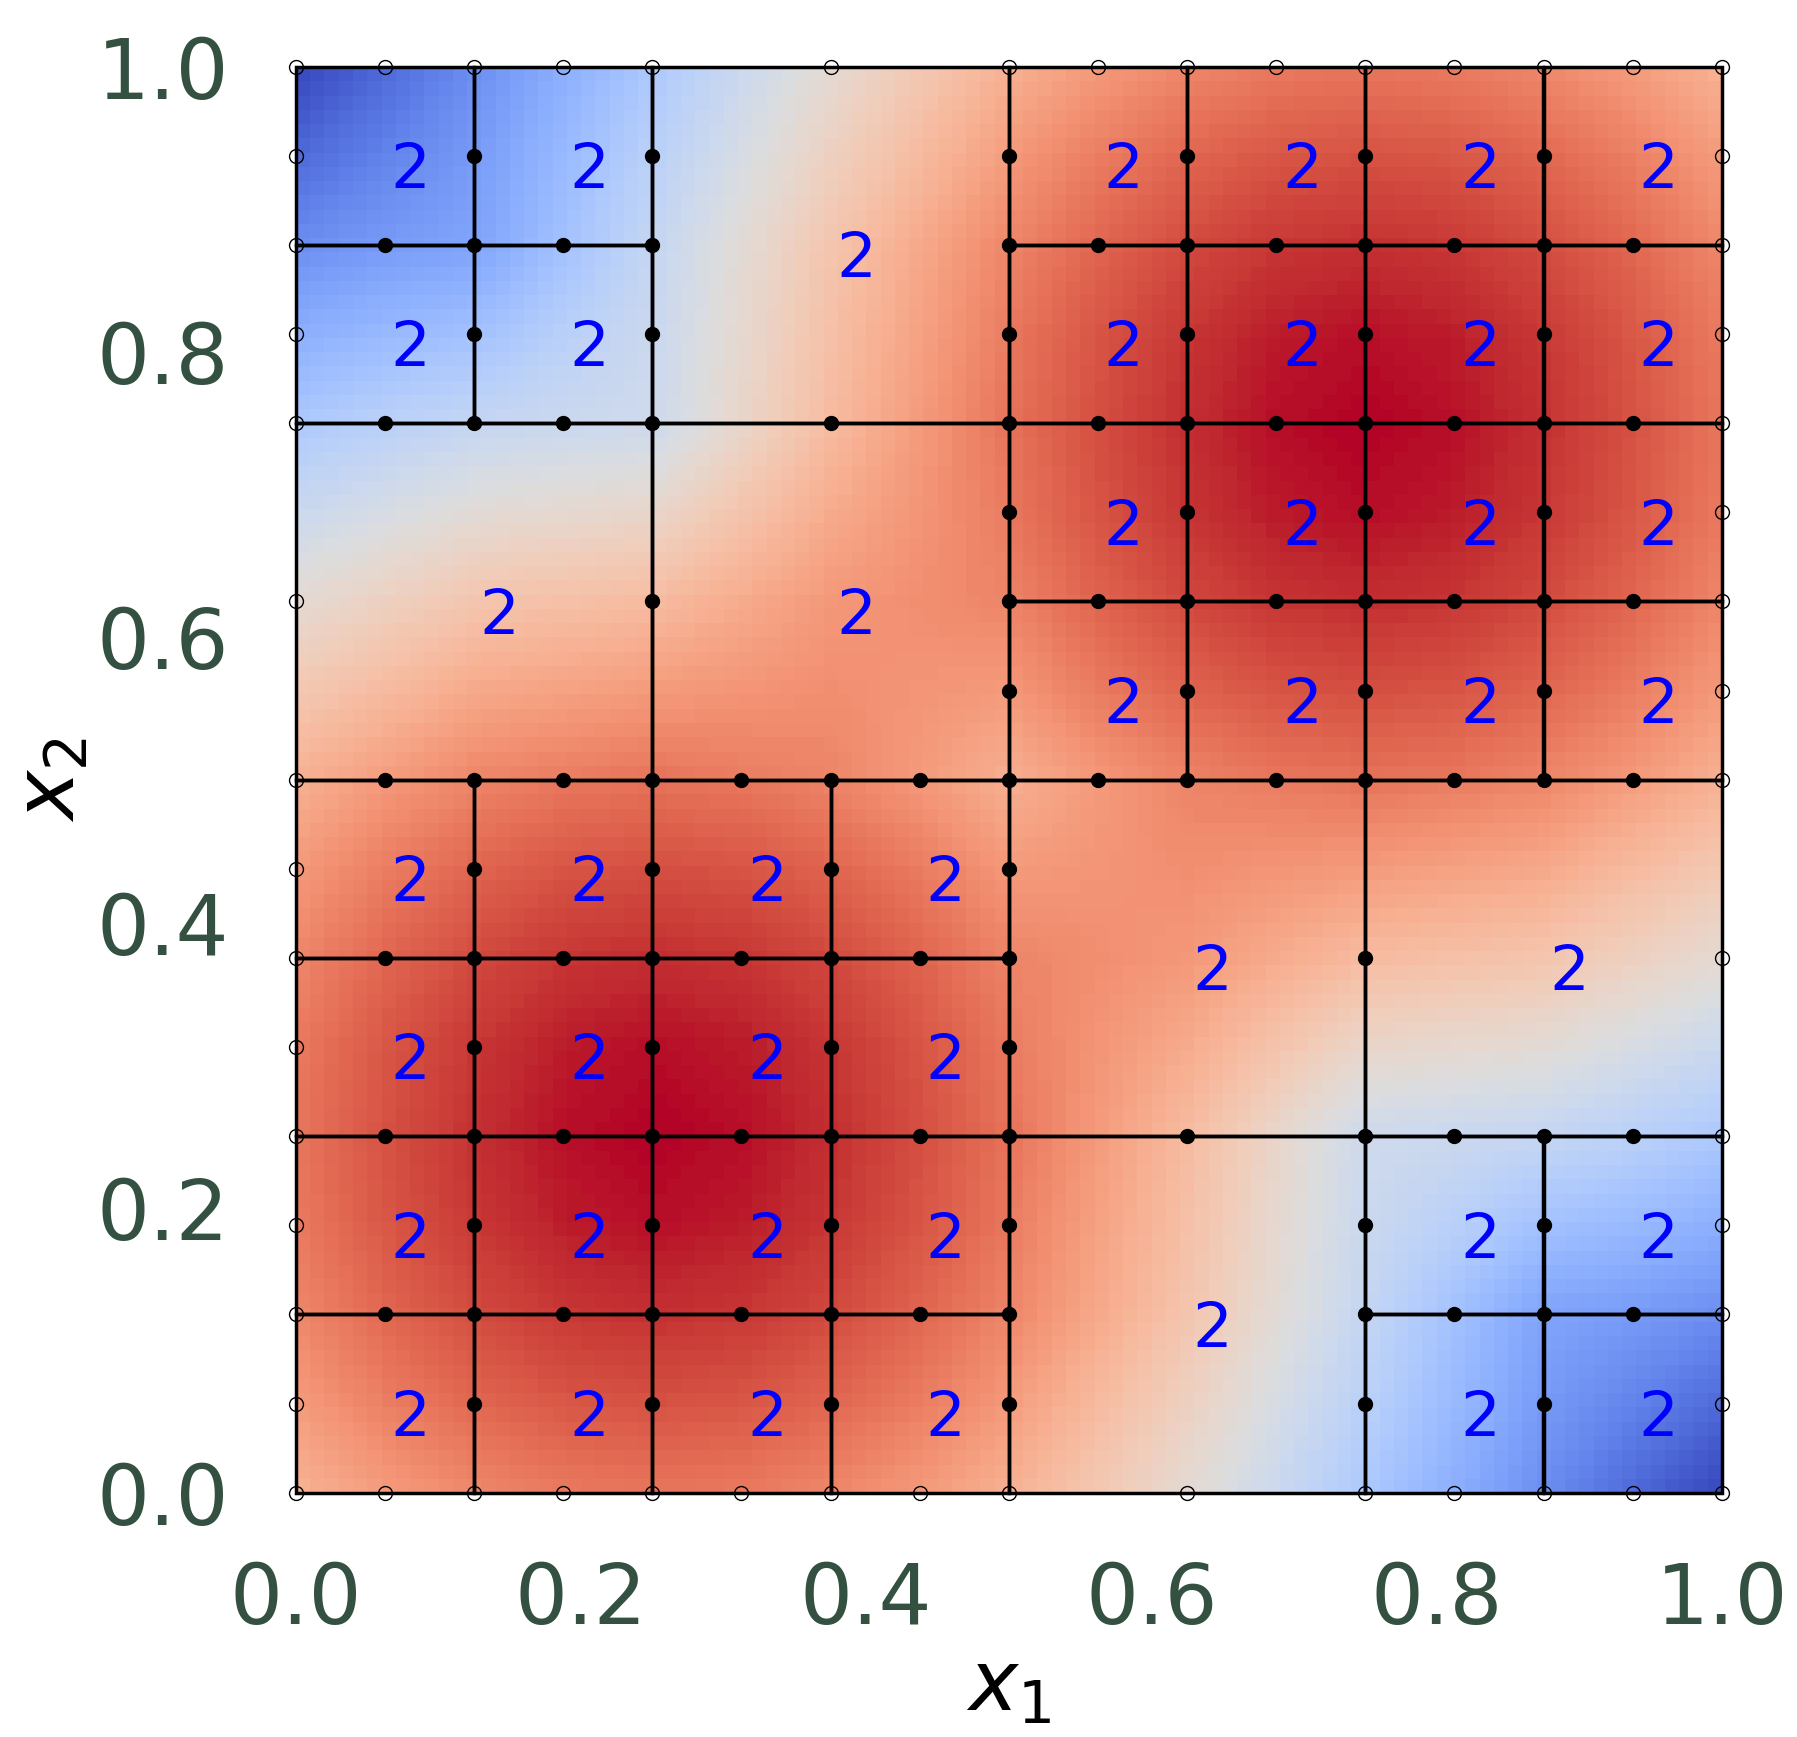

Number of refinements: 14
Number of distinct points used during the refinement: 179
Time used adaptive (s): 1.4551573559983808
Final error: 0.00548190289648647


(<sparseSpACE.RefinementContainer.RefinementContainer at 0x7f0541aeae10>,
 [2, 2],
 array([0.50900061]),
 368,
 [0.016088572279491425,
  0.012152115745137804,
  0.015015159449238001,
  0.012936208651079112,
  0.00548190289648647],
 [21, 47, 65, 91, 179],
 [0.016088572279491425,
  0.012152115745137804,
  0.015015159449238001,
  0.012936208651079112,
  0.00548190289648647],
 [],
 [])

In [ ]:
%matplotlib inline
from sys import path
path.append('../src/')

import numpy as np
from sparseSpACE.spatiallyAdaptiveExtendSplit import *
from sparseSpACE.Function import *
from sparseSpACE.ErrorCalculator import *

# dimensionality of problem
dim = 2

# integration boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function
midpoint = np.ones(dim) * 0.5
coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = mmg_wraped#GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
f.plot(np.ones(dim)*a,np.ones(dim)*b)

# # reference solution for the integration
# reference_solution = f.getAnalyticSolutionIntegral(a,b)

# error estimator
errorOperator=ErrorCalculatorExtendSplit()

# used grid
grid=TrapezoidalGrid(a=a, b=b)

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim)#, reference_solution = reference_solution)

# initialize Extend-Split Strategy
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b, number_of_refinements_before_extend=2, version=0, operation=operation)

# perform spatially adaptive integration
adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(lmin=1,lmax=2,errorOperator=errorOperator,tol=10**-2, do_plot=False, do_last_plot=True)
# performing the spatially adaptive refinement with the Extend-Split method
# adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(1, 2, errorOperator2, max_evaluations=100, do_plot=False, do_last_plot=False)


A new feature of the SpACE framework is that you can enable automatic_extend_split which means that no depth has to be specified and the algorithm itself tries to optimally decide between split and extend operations. This method performs in general quite good but of course cannot beat an perfect setting of the parameter for all situations. Below you can see an example with automatic refinement decision.

0 [1, 2] 1.0
1 [2, 1] 1.0
2 [1, 1] -1.0
Current number of function evaluations 21
combiintegral: 0.5065507351241021
Current error: 0.0033726790596886927
Last plot
Contour plot:


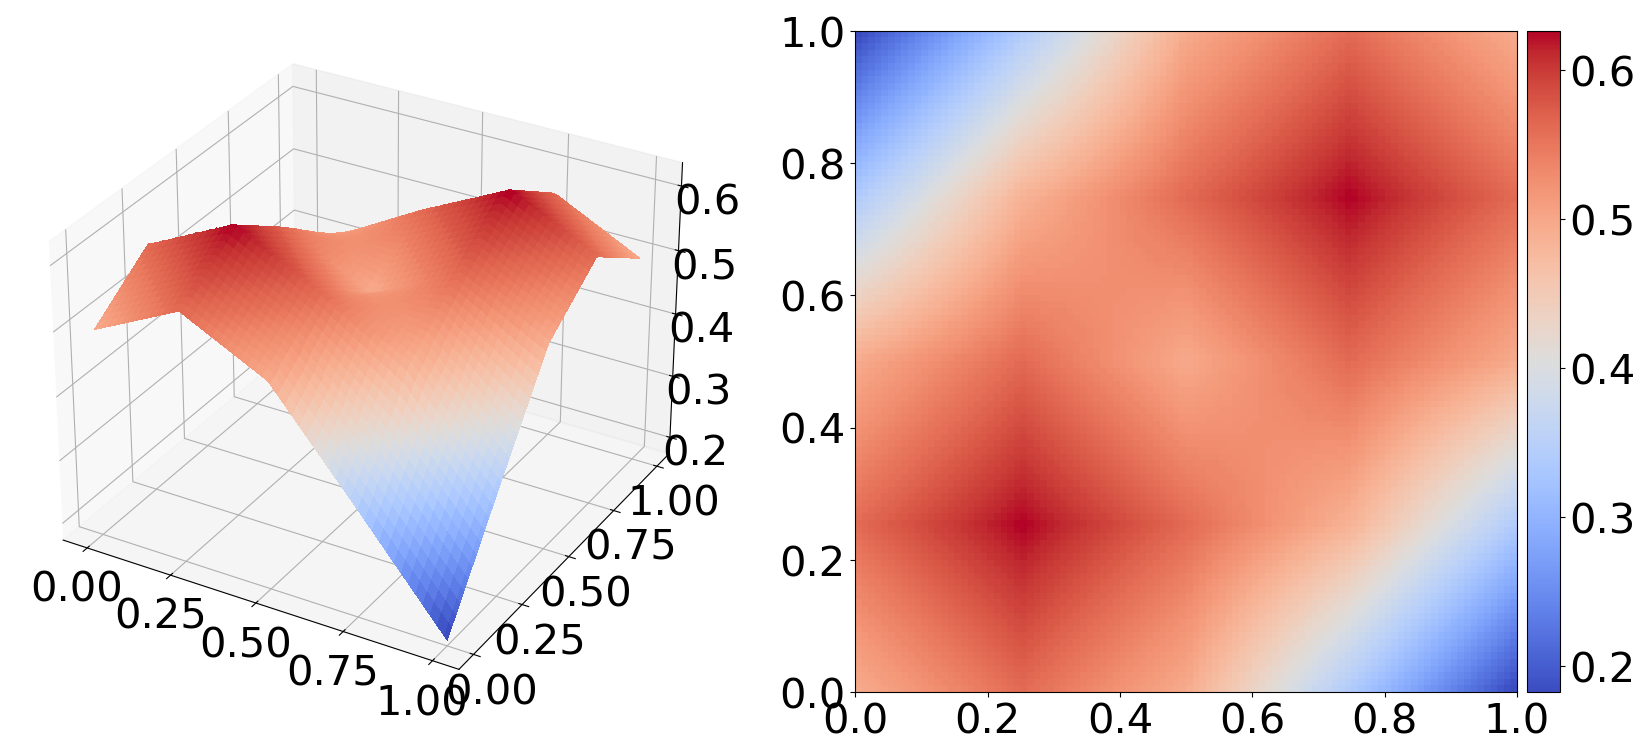

Refinement Graph:


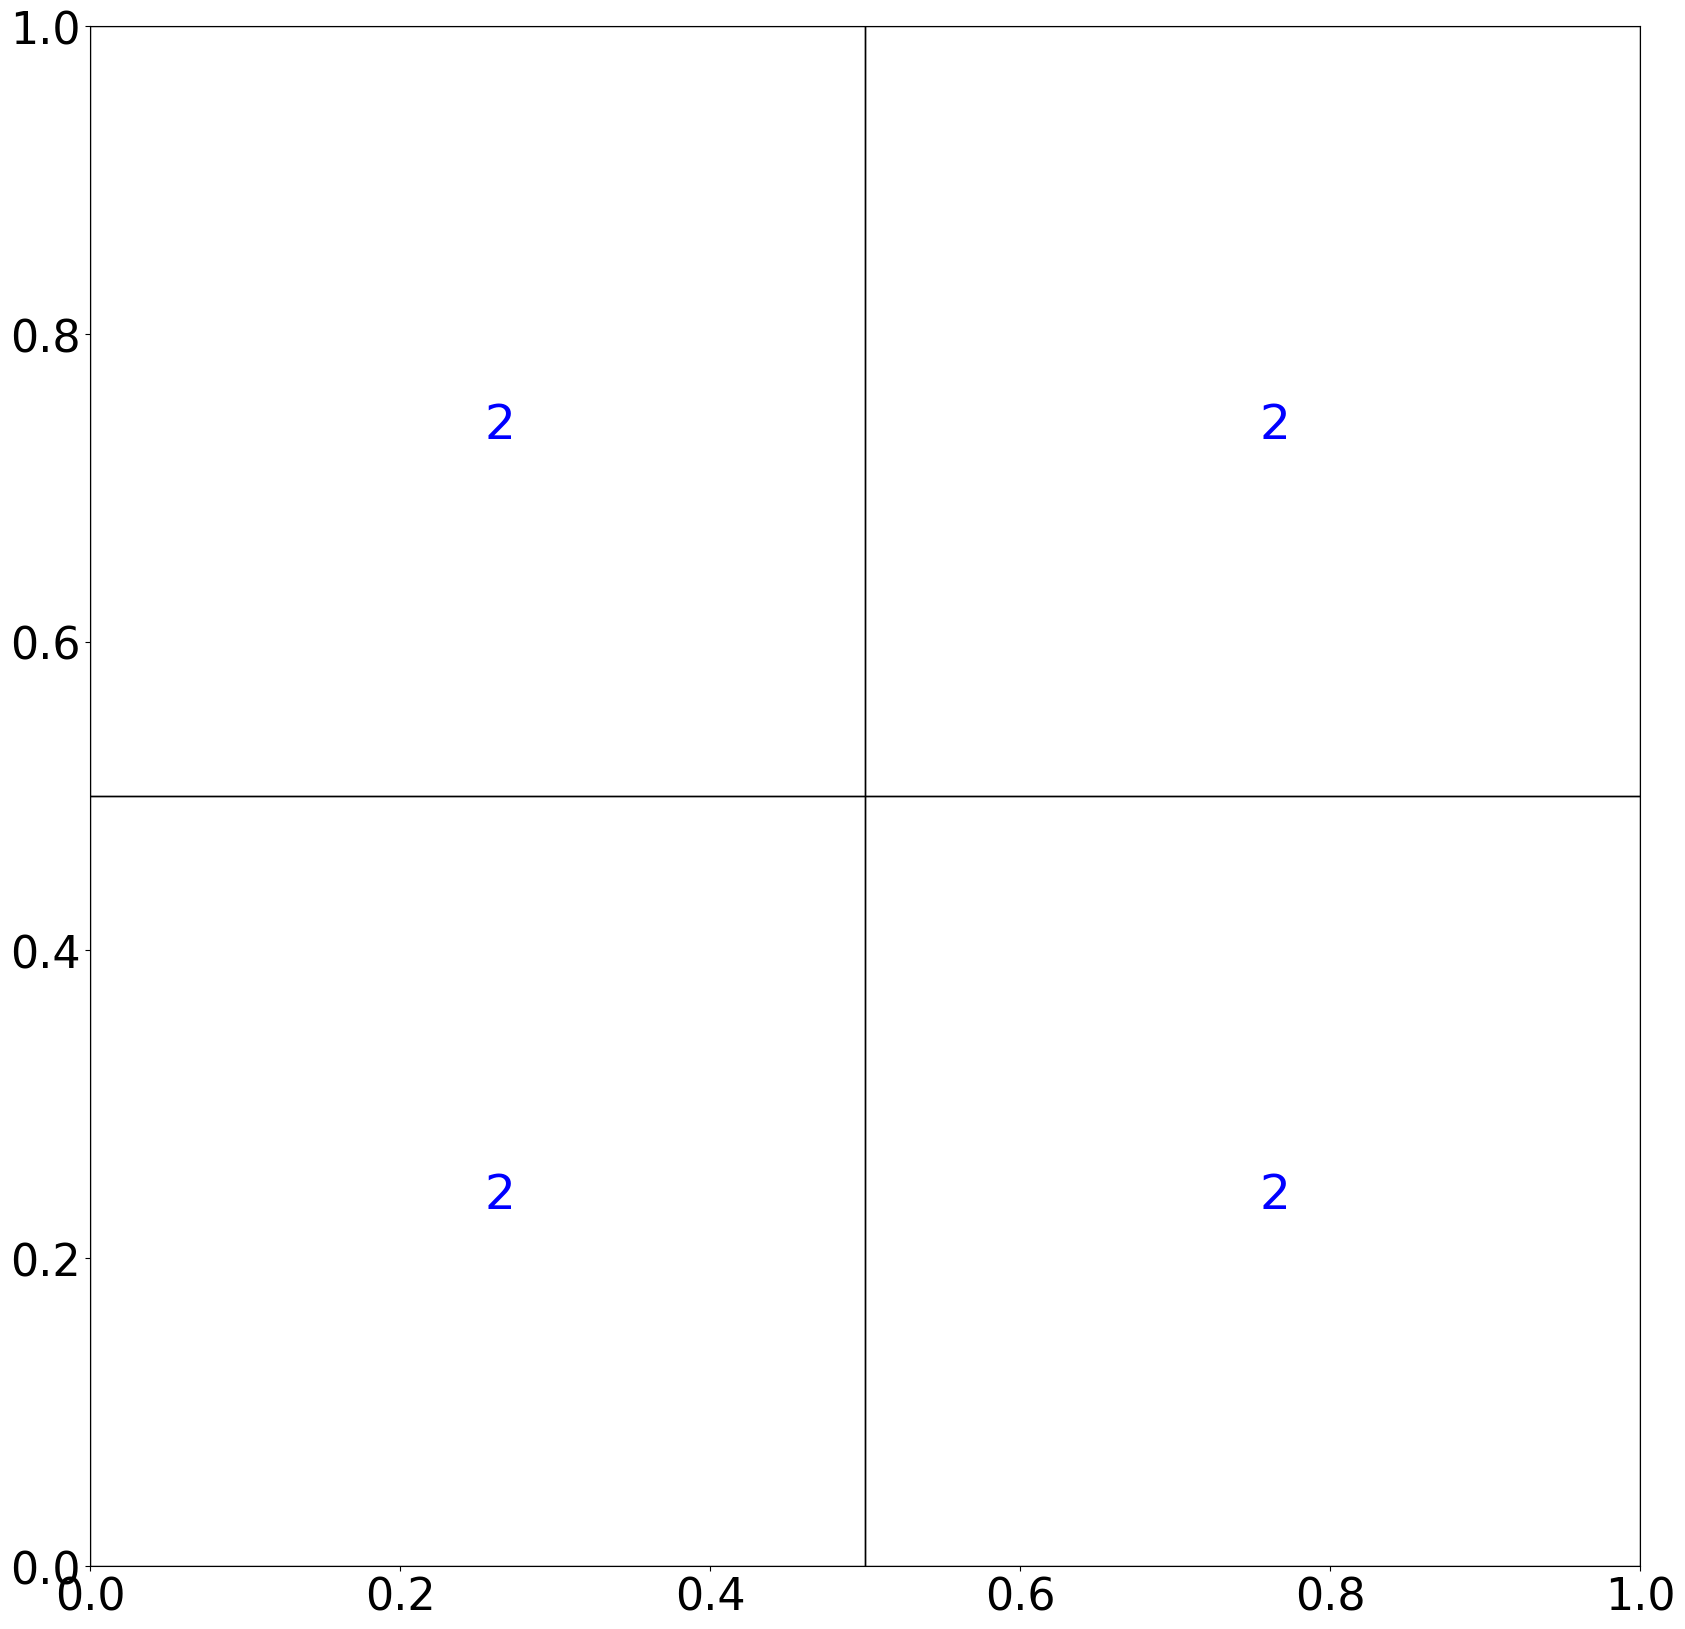

Combi Scheme:


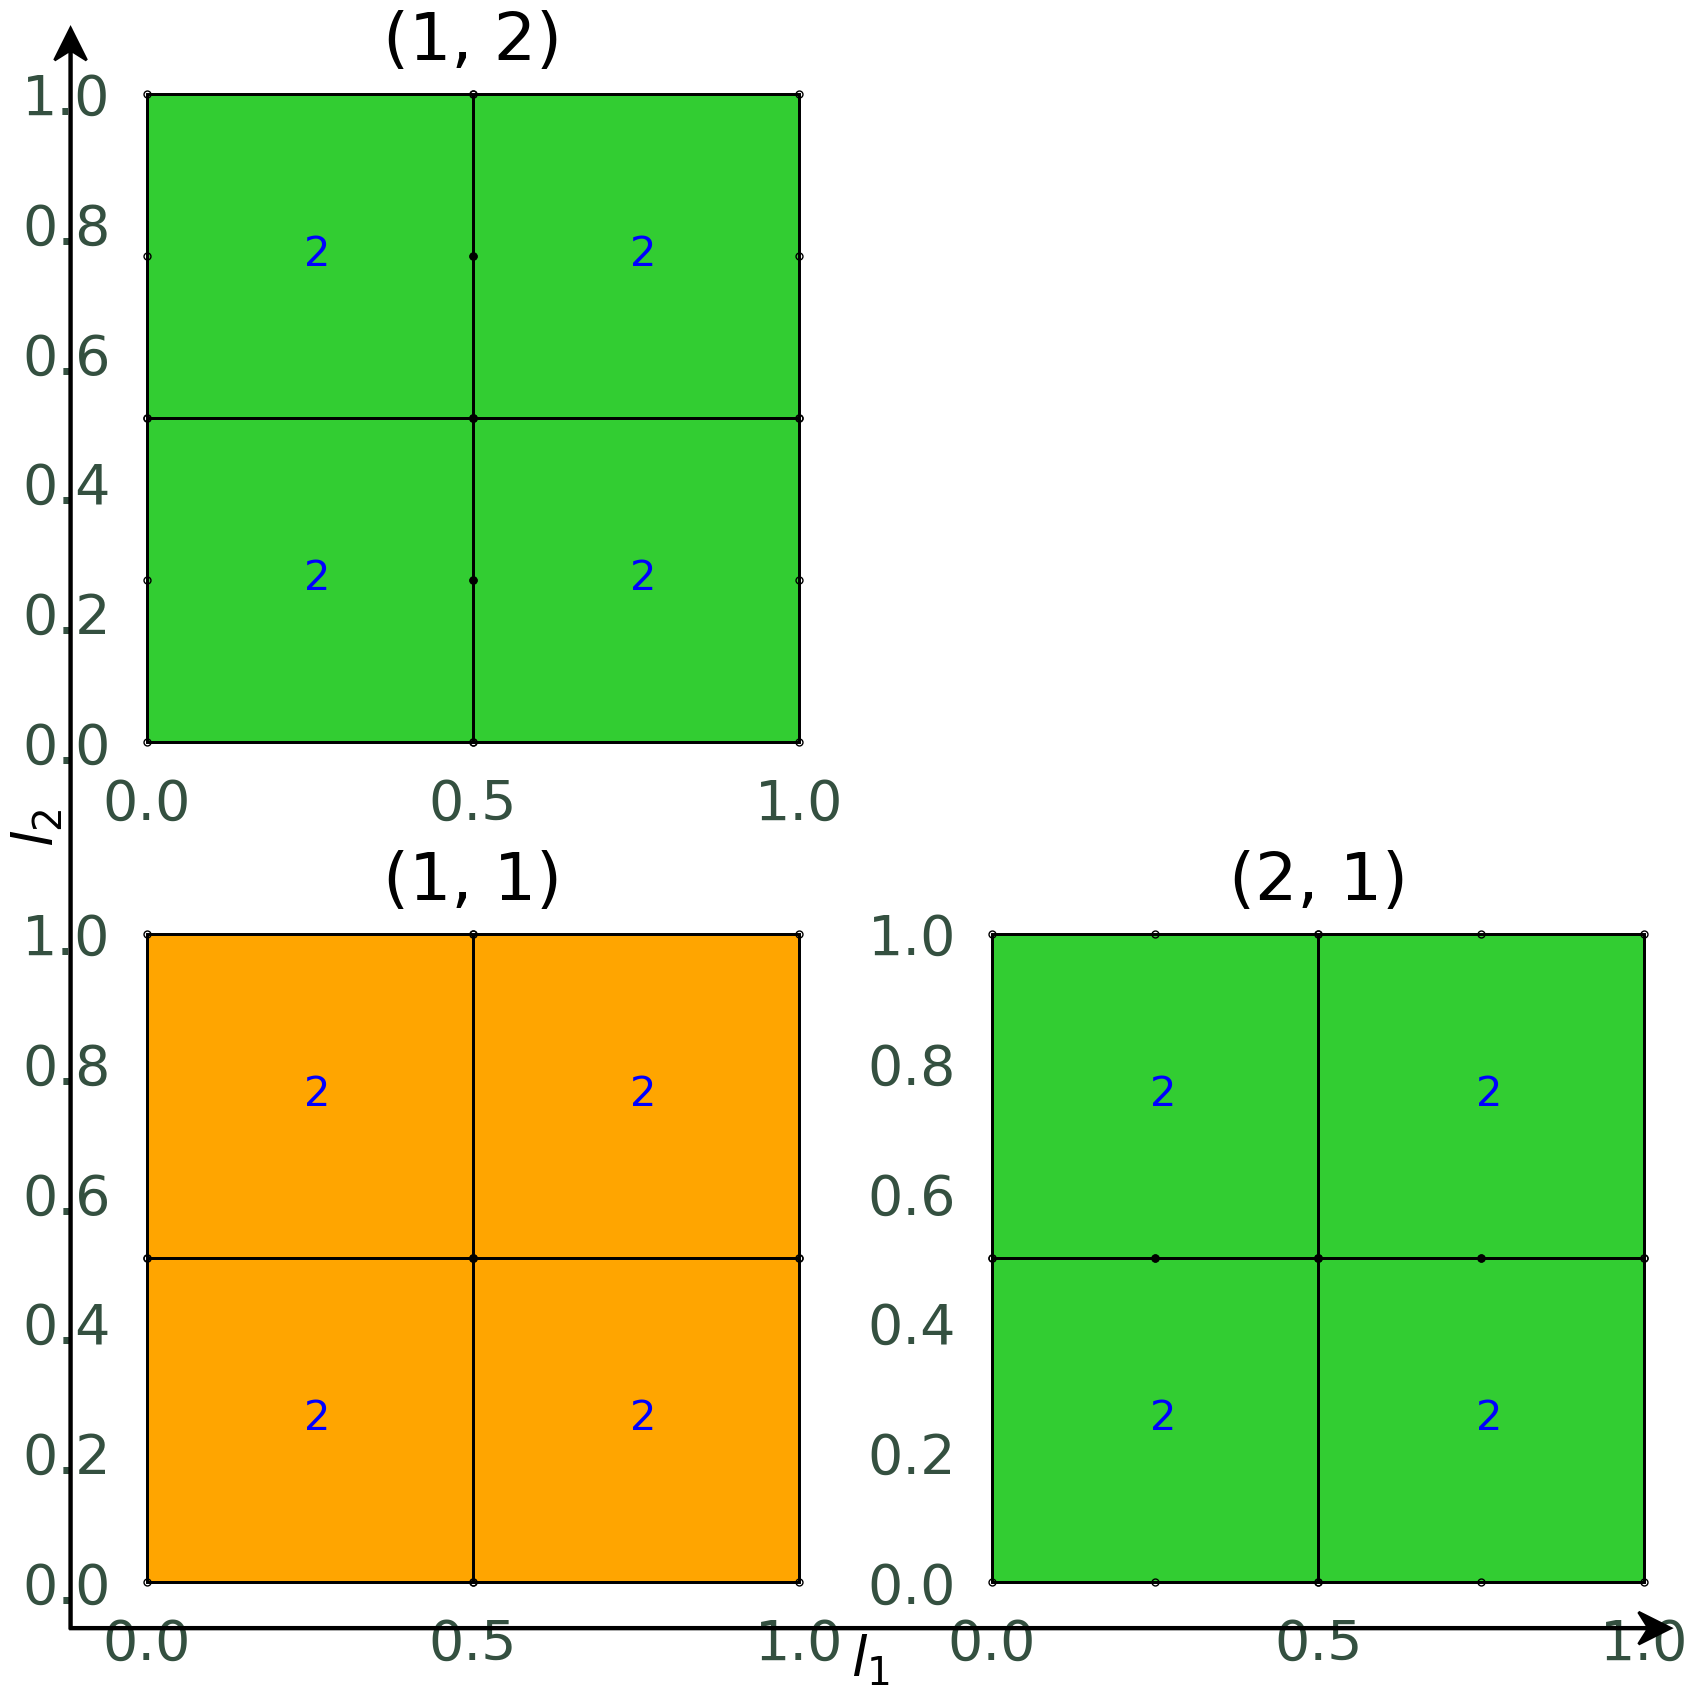

Resulting Sparse Grid:
dim 2
debug mesh [array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
        0.01010101],
       [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
        0.02020202],
       ...,
       [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
        0.97979798],
       [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
        0.98989899],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]]), array([[0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       ...,
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.    

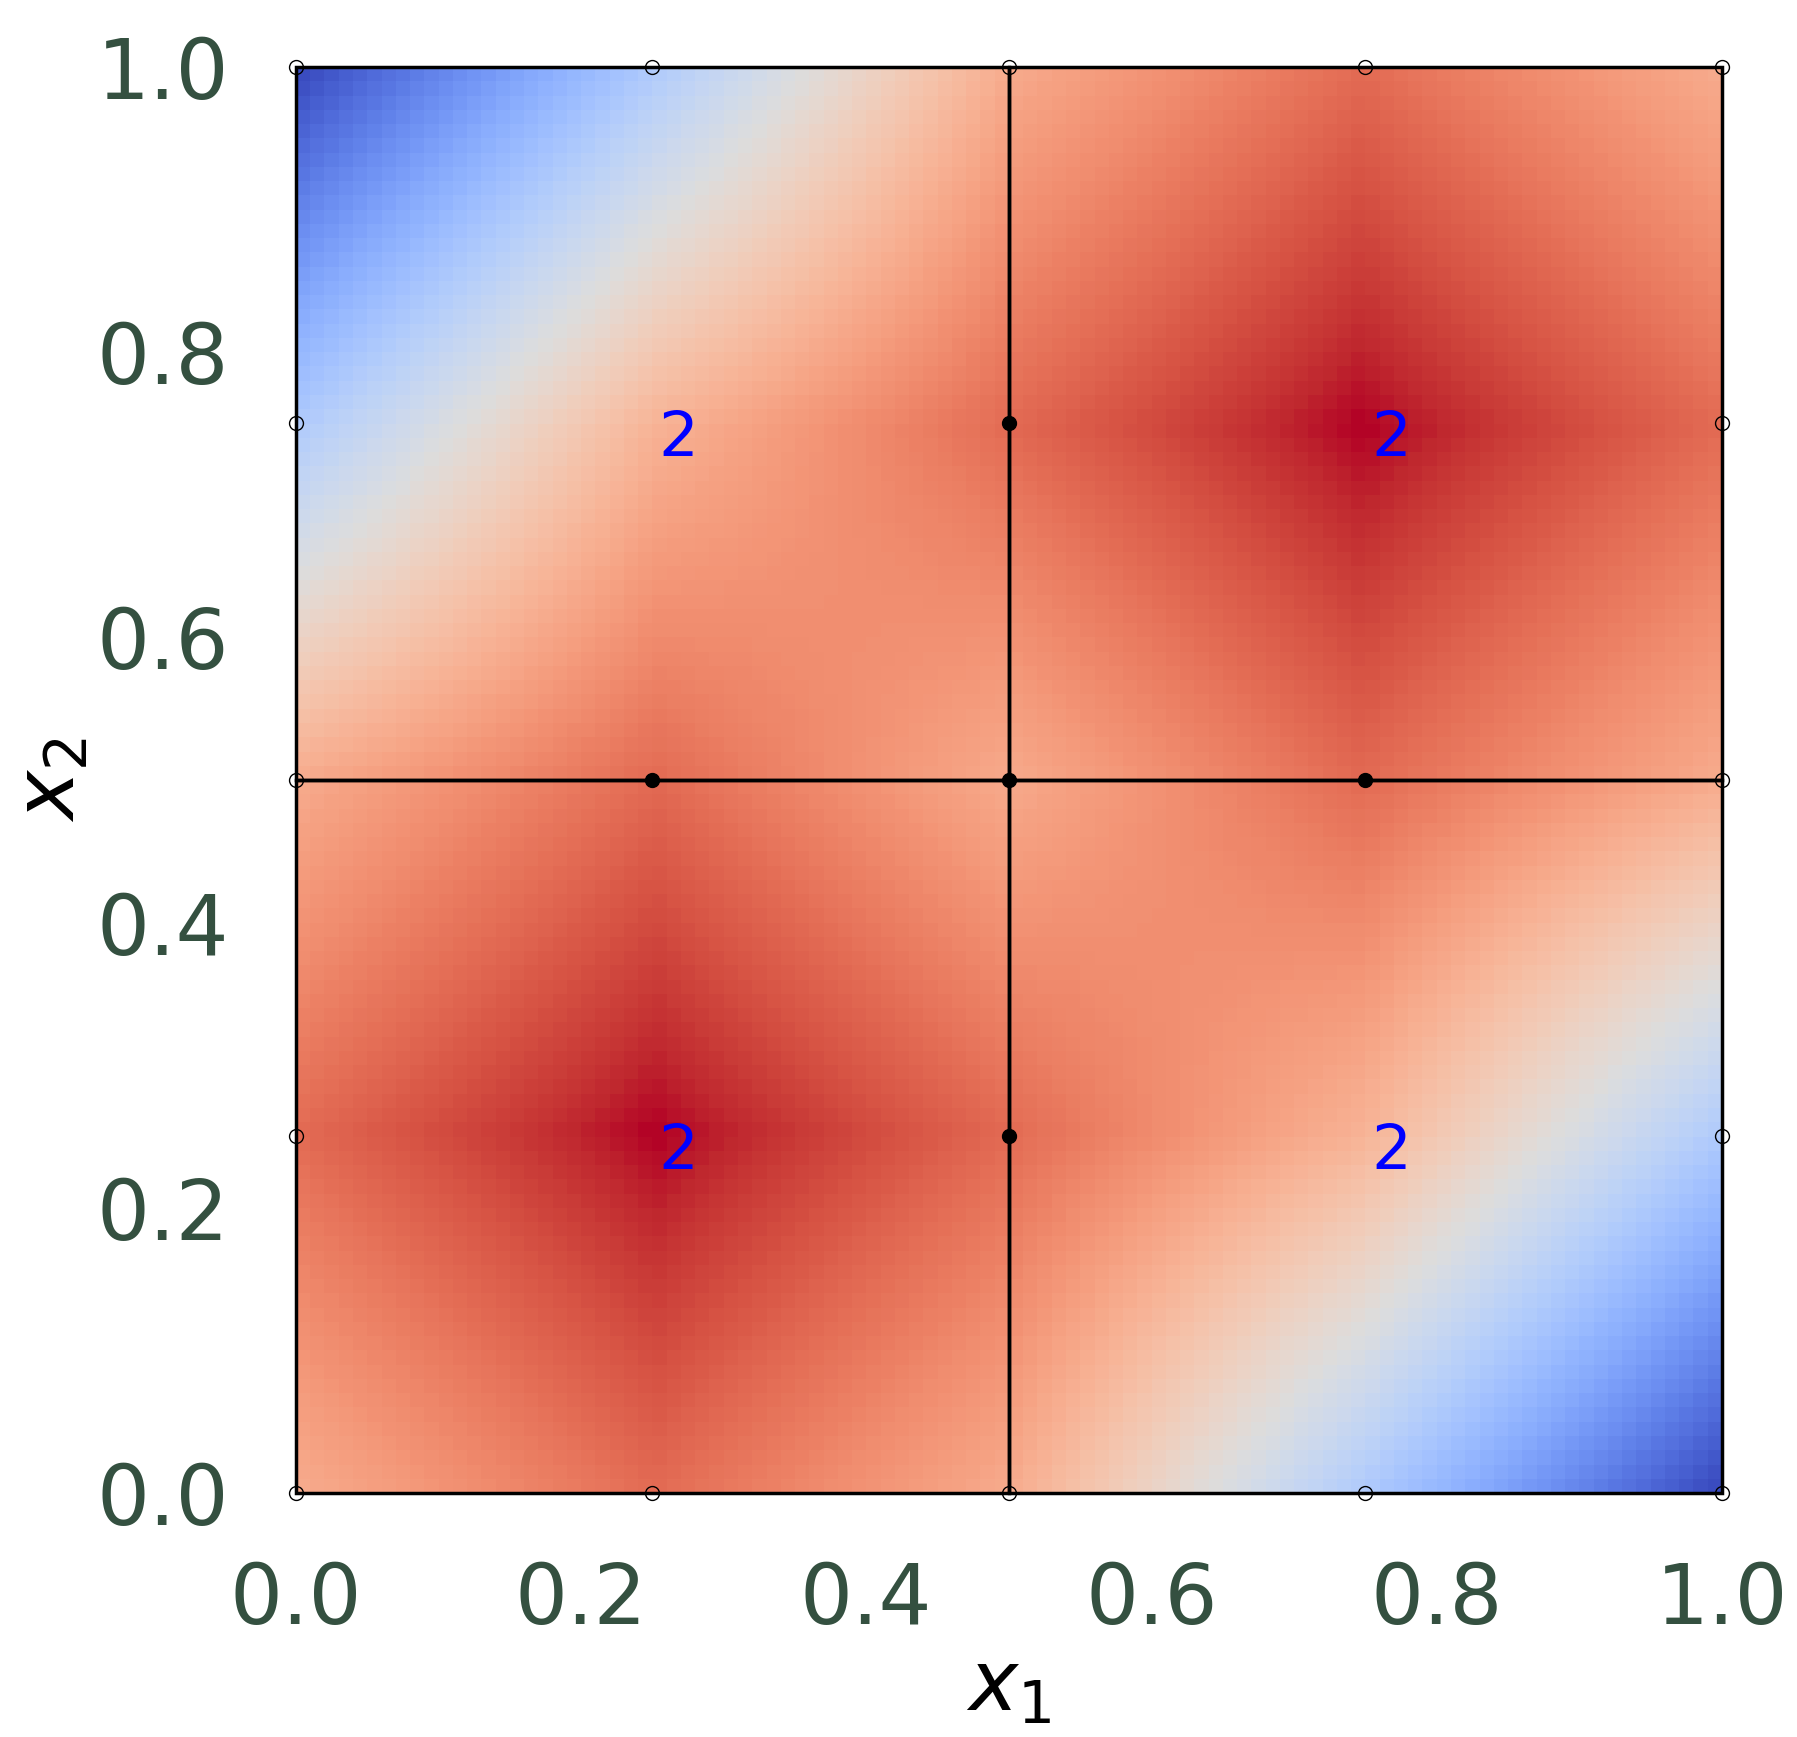

Number of refinements: 0
Number of distinct points used during the refinement: 21
Time used adaptive (s): 0.9089062780003587
Final error: 0.0033726790596886927


(<sparseSpACE.RefinementContainer.RefinementContainer at 0x7f0541004b60>,
 [2, 2],
 array([0.50655074]),
 32,
 [0.0033726790596886927],
 [21],
 [0.016088572279491425],
 [],
 [])

In [12]:
%matplotlib inline
from sys import path
path.append('../src/')

import numpy as np
from sparseSpACE.spatiallyAdaptiveExtendSplit import *
# from sparseSpACE.StandardCombi import *
from sparseSpACE.Function import *
from sparseSpACE.ErrorCalculator import *

# dimensionality of problem
dim = 2

# integration boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define function
# midpoint = np.ones(dim) * 0.5
# coefficients = np.array([ 10**0 * (d+1) for d in range(dim)])
f = mmg_wraped#GenzDiscontinious(border=midpoint,coeffs=coefficients)
# plot function
# f.plot(np.ones(dim)*a,np.ones(dim)*b)

# reference solution for the integration
reference_solution = f.getAnalyticSolutionIntegral(a,b)

# error estimator
errorOperator=ErrorCalculatorExtendSplit()

# used grid
grid=TrapezoidalGrid(a=a, b=b)

# NEW! define operation which shall be performed in the combination technique
from sparseSpACE.GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = reference_solution)

# initialize Extend-Split Strategy
adaptiveCombiInstanceExtend = SpatiallyAdaptiveExtendScheme(a, b, automatic_extend_split=True, version=0, operation=operation)

# perform spatially adaptive integration
adaptiveCombiInstanceExtend.performSpatiallyAdaptiv(lmin=1,lmax=2,errorOperator=errorOperator,tol=10**-2, do_plot=False, do_last_plot=True)